In [1]:
load('../../F21-ETALA/etala_utilities.sage')

# SMP exam fall 2019

## Problem 1:   Probability theory

Formalizing the given information, let T be the event of a positive test, and P the event that the tested game has the parasite. The following statements are known:  
$ \Bbb P\left(P | T\right) = 0.51 $  
$ \Bbb P\left(\bar P | \bar T\right) = 0.56 $  
$ \Bbb P\left(T\right) = 0.4 $  

### a)

The probability of P and T can be found using the multiplication rule:  
$ \Bbb P\left( P \cap T \right) = \Bbb P\left( P | T \right) \Bbb P\left(T \right) = 0.51 \cdot 0.4 = 0.204 $

### b)

The total probability of an animal carrying the parasite can be found using the the formula for total probability and the probability of complements:  
$ \begin{align} \Bbb P\left( P \right) & = \Bbb P\left( P | T \right)  \Bbb P\left( T \right) + \Bbb P\left( P | \bar T \right)  \Bbb P\left( \bar T \right) \\
                                       & = \Bbb P\left( P \cap T \right) + \Bbb P\left( P | \bar T \right)  \Bbb P\left( \bar T \right) \\
                                       & = \Bbb P\left( P \cap T \right) + \left( 1 - \Bbb P\left( \bar P | \bar T \right) \right)  \left( 1 - \Bbb P\left( T \right) \right) \\
                                       & = 0.204 + (1 - 0.56)(1 - 0.4) \\
                                       & = 0.468
\end{align}$

### c)

In order to calculate the probability of a positive test given that an animal has the parasite, the definition of conditional probability can be used:  
$ \Bbb P\left( T | P \right) = \frac{\Bbb P\left( T \cap P \right)}{\Bbb P\left( P \right)} =  \frac{\Bbb P\left( P \cap T \right)}{\Bbb P\left( P \right)} = \frac{0.204}{0.468} = 0.4359 $

## Problem 2:  Stochastic Variables

In [2]:
var('x')
F_X(x) = piecewise((((-oo, -4), 0), ([-4, 16], (1 + (x-6)/10 + sin(pi*(x-6)/10)/pi)/2), ((16, oo), 1)))

### a)

This is found using the cdf:  
$ \Bbb P(X > 5) = 1 - F_X(5) $

In [3]:
P_xgt5 = 1-F_X(5); show_var()

\text{P_xgt5} = \frac{\sqrt{5} - 1}{8 \, \pi} + \frac{11}{20} \sim 0.599

### b)

Since X is a continuous stochastic variable, the probability for it to take on any exact value is 0:  
$\Bbb P\left(X=5\right) = 0$

### c)

Since the cdf is the integral of the pdf, it can be differentiated to obtain the pdf:  

\text{f_X} = piecewise\left(\left(\left(\text{\texttt{({-}oo,{ }{-}4)}}, 0\right), \left(\text{\texttt{[{-}4,{ }16]}}, \frac{1}{20} \, \cos\left(-\frac{3}{5} \, \pi + \frac{1}{10} \, \pi x\right) + \frac{1}{20}\right), \left(\text{\texttt{(16,{ }+oo)}}, 0\right)\right), x\right)

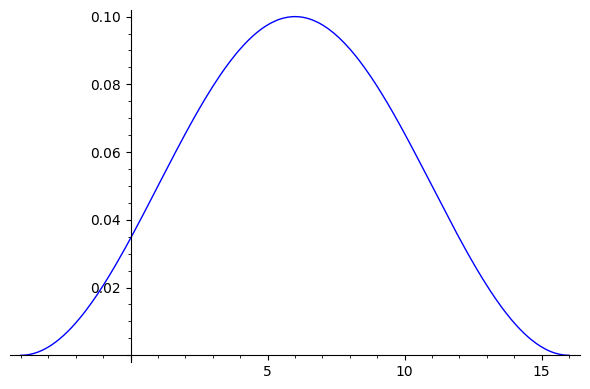

In [4]:
f_X = piecewise((((-oo, -4), 0), ([-4, 16], F_X.expressions()[1].differentiate()), ((16, oo), 0))); show_var()
plot(f_X, xmin=-4, xmax=16)

### d)

The mean of X is defined as  
$EX = \int x f_X(x) dx$

In [5]:
EX = multiply_piecewise(f_X, x).integral(definite=True); show_var()

\text{EX} = \frac{11 \, \pi^{2} - 10}{2 \, \pi^{2}} + \frac{\pi^{2} + 10}{2 \, \pi^{2}} \sim 6.00

### e)

The variance of X is found as  
$ E\left(X^2\right) - EX^2 $  
Using the same method as above to find $ E\left(X^2\right)$

In [6]:
EX2 = multiply_piecewise(f_X, x^2).integral(definite=True); show_var()
VarX = EX2 - EX^2; show_var()

\text{EX2} = \frac{2 \, {\left(97 \, \pi^{2} - 240\right)}}{3 \, \pi^{2}} + \frac{2 \, {\left(7 \, \pi^{2} - 60\right)}}{3 \, \pi^{2}} \sim 49.1

\text{VarX} = -\frac{1}{4} \, {\left(\frac{11 \, \pi^{2} - 10}{\pi^{2}} + \frac{\pi^{2} + 10}{\pi^{2}}\right)}^{2} + \frac{2 \, {\left(97 \, \pi^{2} - 240\right)}}{3 \, \pi^{2}} + \frac{2 \, {\left(7 \, \pi^{2} - 60\right)}}{3 \, \pi^{2}} \sim 13.1

## Problem 3:  Stochastic processes

### a)

Firstly a method is defined for generating a realization of the given function, by sampling the relevant distribution classes in scipy.stat. This method is then used to generate a sample of the process which is plottet using matplotlib. The code is shown below along with the result.

<IPython.core.display.Javascript object>


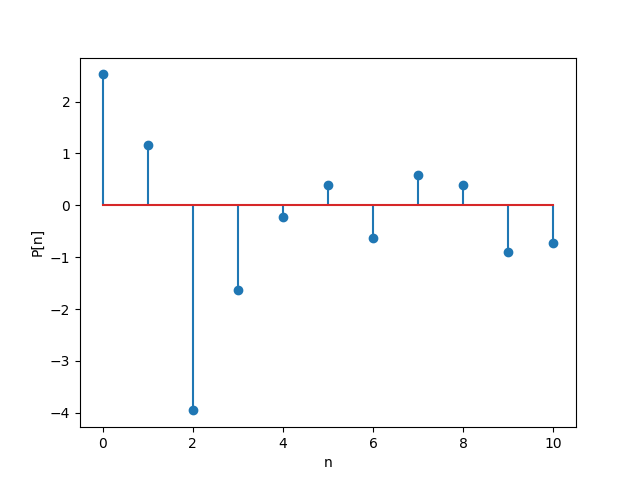

In [7]:
%matplotlib notebook
from scipy.stats import binom, norm
import matplotlib.pyplot as plt
def realization_of_X(n):
    sample_len = len(n)
    Y = binom.rvs(2, 0.2)
    W = norm.rvs(0, 2, sample_len)
    return [-Y+W[n] for n in range(sample_len)]

num_realizations = 3
_n = range(11)
realization = realization_of_X(_n)
fig, ax = plt.subplots()
ax.stem(_n, realization)
ax.set_xlabel('n')
ax.set_ylabel('P[n]')
fig.show()

### b)

The ensemble mean and variance is derived from the formula of the process using the algebraic rules of expectation and variance:  
$ E(X[n]) = E(-Y + W[n]) = -E(Y) + E(W[n]) $  
The mean of Y is found using the formula for the mean of a binomially distributed variable ($np$), while W is directly parameterized by the mean. Substituting the values:  
$ E(X[n]) = -2\cdot0.2 + 0 = - 0.4 $  
  
Similarly the variance can be derived:  
$Var(X[n]) = Var(-Y + W[n]) = Var(Y) + Var(W[n]) = 2 \cdot 0.2 \cdot (1-0.2) + 2 = 2.32$

### c)

Using the same principles as above, only taking into account that Y is a constant for any single realization:  
$ E_{temp}(X[n]) = E_{temp}(-Y + W[n]) = -Y + E(W[n]) = -Y $  


### d)

Since the mean and variance of the process are independent of the time, __the process is WSS.__  
Given that the mean and variance both differ for the ensemble and temporal, __the process is not ergodic__.

## Problem 4:  Statistics

In [19]:
year = [1955 + i for i in range(16)]
cigarettes = [856, 872, 895, 966, 1038, 1093, 1111, 1149, 1212, 1120, 1165, 1207, 1149, 1219, 1308, 1322]

### a)

<IPython.core.display.Javascript object>


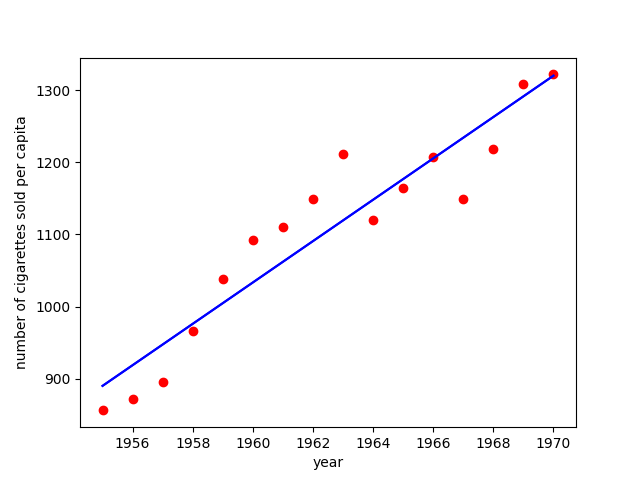

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt

fix, ax = plt.subplots()
ax.plot(year, cigarettes, 'ro')
ax.set_xlabel('year')
ax.set_ylabel('number of cigarettes sold per capita')
fix.show()

### b)

The empirical mean is computed as  
$ E(X) = \frac 1 n \sum_{i=0}^n x_i $ 

In [22]:
mean_year = sum(year)/len(year); show_var()
mean_cigarettes = sum(cigarettes)/len(cigarettes); show_var()

\text{mean_year} = \frac{3925}{2} = 1962.5

\text{mean_cigarettes} = \frac{8841}{8} = 1105.125

### c)

In order to determine the slope ($\beta$) and intersection($\alpha$) of the linear regression, the following formulas are used:  
$ \hat \beta = \dfrac{\sum_{i=1}^n\left(x_i-\bar x\right)\left(y_i-\bar y\right)}{\sum_{i=1}^n\left(x_i-\bar x\right)^2} = \dfrac{\sum_{i=1}^n\left(x_i y_i-\bar x \bar y\right)}{\sum_{i=1}^n\left(x_i-\bar x\right)^2} = \dfrac{s_{xy}}{s_{xx}}$  
where $s_{xy}$ is the covariance of x and y, while $s_{xx}$ is the variance of x

In [31]:
height = [55, 60, 70, 75, 79, 90, 101, 112, 121, 129, 134, 143]
age    = [ 1,  3,  6,  9, 12, 24,  36,  48,  60,  72,  84,  96]

x = year
y = cigarettes
ex = mean_year
ey = mean_cigarettes
n_ = len(year)

s_xy = sum([x[i]*y[i] - ex*ey for i in range(n_)])
s_xx = sum([(x[i]-ex)^2 for i in range(n_)])
beta = s_xy/s_xx; show_var()
alpha = ey - beta*ex; show_var()

ax.plot(year, [alpha + beta*x for x in year], 'b-')
fig.show()

\text{beta} = \frac{9751}{340} = 28.6796875

\text{alpha} = -\frac{3752119}{68} = -55180.

The fitted line has been added to the plot of the data above.

### d)

The residuals are found by taking the difference of each measurement, and the predicted value for the same year:  
$ \epsilon = y - \hat y = y - (\alpha + \beta x)$

<IPython.core.display.Javascript object>


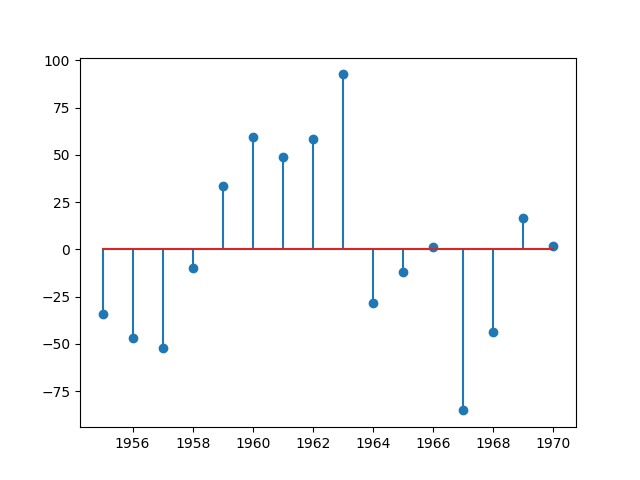

In [36]:
residuals = [y - (alpha + beta*x) for y, x in zip(cigarettes, year)]
fig, ax = plt.subplots()
ax.stem(year, residuals)
fig.show()

### e)

The null hypothesis for testing if there is a linear relation between x and y is  
$H_0\text{:}\quad \hat beta = \beta_0 = 0$  
$H_1\text{:}\quad \hat beta \ne \beta_0$  

Using the test statistic  
$ t = \dfrac{\hat \beta - \beta_0}{\sqrt{S_r^2 / S_{xx}}} \sim t(n-2) $  
Where $s_r^2$ is the empirical variance, $s_xx$ is the variance of the x data, and $t$ is the student t distribution.

Which results in the p-value:  
$\textit{p-val} = 2\left(1-t_{cdf}\left(\left\vert t\right\vert, n-2\right)\right)$

### f)

In [38]:
import scipy.stats
sr2 = 1/(n_-2) * sum([r^2 for r in residuals])  # the empirical variance is calculated from the residuals
t = beta/sqrt(sr2/s_xx); show_var()
p_val = 2*(1-scipy.stats.t.cdf(float(abs(t)), n_-2)); show_var()

\text{t} = \frac{68257}{2015679} \, \sqrt{\frac{671893}{7}} \sim 10.5

\text{p_val} = \text{\texttt{5.141095860139444e{-}08}} \sim 5.14 \times 10^{-8}

### g)

With a p-value very significantly smaller than the significance level, __the null hypothesis is rejected__. There's a significant indication of a linear trend in the data, which also corresponds to intuition when lookking at the plottet data.